## Подгрузим библиотеки

In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

## Считаем файл с фьючерсом

In [2]:
data = pd.read_csv('concat_RI.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

## Считали

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     4072 non-null   int64         
 1   date           4072 non-null   datetime64[ns]
 2   close          4055 non-null   float64       
 3   name           4072 non-null   object        
 4   return         4071 non-null   float64       
 5   ln_r           4071 non-null   float64       
 6   volatility_5   4067 non-null   float64       
 7   volatility_20  4052 non-null   float64       
 8   volatility_60  4005 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 286.4+ KB


In [5]:
data.head(5)

,Unnamed: 0,date,close,name,return,ln_r,volatility_5,volatility_20,volatility_60
0,0,2006-09-15,156180.0,RIH07-ru.csv,NaN,NaN,NaN,NaN,NaN
1,1,2006-09-18,158760.0,RIH07-ru.csv,1.016519,0.016384,NaN,NaN,NaN
2,2,2006-09-19,160200.0,RIH07-ru.csv,1.009070,0.009029,NaN,NaN,NaN
3,3,2006-09-20,NaN,RIH07-ru.csv,1.000000,0.000000,NaN,NaN,NaN
4,4,2006-09-21,154995.0,RIH07-ru.csv,0.967509,-0.033030,NaN,NaN,NaN


In [6]:
data.tail(5)

,Unnamed: 0,date,close,name,return,ln_r,volatility_5,volatility_20,volatility_60
4067,4067,2022-11-29,112650.0,RIZ22-ru.csv,1.008957,0.008917,13.691348,27.127537,35.577041
4068,4068,2022-11-30,112140.0,RIZ22-ru.csv,0.995473,-0.004538,13.726187,27.141724,35.473038
4069,4069,2022-12-01,111930.0,RIZ22-ru.csv,0.998127,-0.001874,13.440082,27.024941,35.337671
4070,4070,2022-12-02,110750.0,RIZ22-ru.csv,0.989458,-0.010598,14.471873,27.091311,35.215672
4071,4071,2022-12-05,111750.0,RIZ22-ru.csv,1.009029,0.008989,13.884235,24.312722,35.050102


In [7]:
am = arch_model(data['return'].dropna())
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4388982144.669955
Iteration:      2,   Func. Count:     18,   Neg. LLF: -10440.245199828616
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10440.245225687908
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [8]:
# Specify GARCH model assumptions
ar_am = arch_model(data['return'].dropna(), p = 1, q = 1, mean = 'AR', vol = 'GARCH')
# Fit the model
ar_am_result = ar_am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4388982144.669955
Iteration:      2,   Func. Count:     18,   Neg. LLF: -10440.245199828616
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10440.245225687908
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [9]:
# Specify GARCH model assumptions / o = 1 for assimetric volatility shock (GJR-GARCH)
ar_am1 = arch_model(data['return'].dropna(), p = 1, q = 1, o = 1, mean = 'constant', vol = 'GARCH')
# Fit the model
ar_am1_result = ar_am1.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1159731770.1412833
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1357420363041.5444
Iteration:      3,   Func. Count:     37,   Neg. LLF: 4.990004695231565e+26
Iteration:      4,   Func. Count:     53,   Neg. LLF: 9070794262364.764
Iteration:      5,   Func. Count:     68,   Neg. LLF: -10480.454009542267
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10480.454032870599
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 5


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [10]:
# Specify EGARCH model assumptions
ar_egm = arch_model(data['return'].dropna(), p = 1, q = 1, o = 1, mean = 'constant', vol = 'EGARCH')
# Fit the model
ar_egm_result = ar_egm.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2.617019145583435e+16
Iteration:      2,   Func. Count:     21,   Neg. LLF: 99212244.31898855


/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     32,   Neg. LLF: 630068726433.63
Iteration:      4,   Func. Count:     42,   Neg. LLF: 183362567831.80435
Iteration:      5,   Func. Count:     52,   Neg. LLF: -10451.879340177078
Iteration:      6,   Func. Count:     59,   Neg. LLF: 8353000684.041319
Iteration:      7,   Func. Count:     69,   Neg. LLF: -10497.8664874432
Iteration:      8,   Func. Count:     75,   Neg. LLF: -10498.153197599966
Iteration:      9,   Func. Count:     81,   Neg. LLF: -10498.168788524865
Iteration:     10,   Func. Count:     87,   Neg. LLF: -10498.16903567874
Iteration:     11,   Func. Count:     93,   Neg. LLF: -10498.169055440718
Iteration:     12,   Func. Count:     98,   Neg. LLF: -10498.169055395134
Optimization terminated successfully    (Exit mode 0)
            Current function value: -10498.169055440718
            Iterations: 12
            Function evaluations: 98
            Gradient evaluations: 12


In [11]:
# Specify GARCH model assumptions
t_gm = arch_model(data['return'].dropna(), p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 't')
# Fit the model
t_result = t_gm.fit()

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 105446.00139252759
Iteration:      2,   Func. Count:     23,   Neg. LLF: 804716.9218803856
Iteration:      3,   Func. Count:     33,   Neg. LLF: 13941.997898341417
Iteration:      4,   Func. Count:     43,   Neg. LLF: 81638.75630668066
Iteration:      5,   Func. Count:     59,   Neg. LLF: 673095.5787518327
Iteration:      6,   Func. Count:     75,   Neg. LLF: 18309.19470447585
Iteration:      7,   Func. Count:     81,   Neg. LLF: 1781670.84133676
Iteration:      8,   Func. Count:     88,   Neg. LLF: 17291.37406776133
Iteration:      9,   Func. Count:     94,   Neg. LLF: 14752.39057487227
Iteration:     10,   Func. Count:    100,   Neg. LLF: 13962.06722468228
Iteration:     11,   Func. Count:    107,   Neg. LLF: 15139.466655781283
Iteration:     12,   Func. Count:    117,   Neg. LLF: 39700.270803246865
Iteration:     13,   Func. Count:    129,   Neg. LLF: 1142232.4078832965
Iteration:     14,   Func. Count:    142,   Neg. LLF: 578014

In [12]:
# Specify GARCH model assumptions
skewt_gm = arch_model(data['return'].dropna(), p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 102506.73986189446
Iteration:      2,   Func. Count:     25,   Neg. LLF: 539621.555242572
Iteration:      3,   Func. Count:     36,   Neg. LLF: 14235.602250913762
Iteration:      4,   Func. Count:     46,   Neg. LLF: 26451.398861305865
Iteration:      5,   Func. Count:     54,   Neg. LLF: 827010.0834124226
Iteration:      6,   Func. Count:     71,   Neg. LLF: 39843.944533556045
Iteration:      7,   Func. Count:     79,   Neg. LLF: 39681.33131407673
Iteration:      8,   Func. Count:     87,   Neg. LLF: 31968.5426543378
Iteration:      9,   Func. Count:     94,   Neg. LLF: 30497.743316260014
Iteration:     10,   Func. Count:    102,   Neg. LLF: 30021.539913642817
Iteration:     11,   Func. Count:    109,   Neg. LLF: 213132.26061194978
Iteration:     12,   Func. Count:    117,   Neg. LLF: 471879.7287807964
Iteration:     13,   Func. Count:    126,   Neg. LLF: 145759.8863632597
Iteration:     14,   Func. Count:    135,   Neg. LLF: 12823

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     16,   Func. Count:    154,   Neg. LLF: 584194.1538339161
Iteration:     17,   Func. Count:    166,   Neg. LLF: 3560.057749498183
Iteration:     18,   Func. Count:    175,   Neg. LLF: 1838967.8783679083
Iteration:     19,   Func. Count:    183,   Neg. LLF: 327536.5276279628
Iteration:     20,   Func. Count:    191,   Neg. LLF: 307224.94653863343
Iteration:     21,   Func. Count:    208,   Neg. LLF: 131536.3433466221
Iteration:     22,   Func. Count:    225,   Neg. LLF: 19185.070413891182
Iteration:     23,   Func. Count:    234,   Neg. LLF: 18038433.46264641
Iteration:     24,   Func. Count:    242,   Neg. LLF: 16474.18287887933
Iteration:     25,   Func. Count:    249,   Neg. LLF: 44471.59522428499
Iteration:     26,   Func. Count:    257,   Neg. LLF: 1100.9121214373545
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 1100.9121087326544
            Iterations: 30
            Function evaluations: 257
            Gradient

/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [13]:
print(res.params)

mu          1.000912
omega       0.000013
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64


In [14]:
print(t_result.params)

mu            1.000970
omega         0.005342
alpha[1]      0.882926
beta[1]       0.010775
nu          358.896712
Name: params, dtype: float64


In [15]:
print(skewt_result.params)

mu            0.457122
omega         0.001042
alpha[1]      1.000000
beta[1]       0.000010
eta         115.662537
lambda       -0.712337
Name: params, dtype: float64


In [16]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10440.2
Distribution:                  Normal   AIC:                          -20872.5
Method:            Maximum Likelihood   BIC:                          -20847.2
                                        No. Observations:                 4071
Date:                Tue, Dec 06 2022   Df Residuals:                     4070
Time:                        13:22:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0009  2.278e-04   4394.241      0.000 [  1.000,  1.00

In [17]:
print(t_result.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                       return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                6562.50
Distribution:      Standardized Student's t   AIC:                          -13115.0
Method:                  Maximum Likelihood   BIC:                          -13083.4
                                              No. Observations:                 4071
Date:                      Tue, Dec 06 2022   Df Residuals:                     4070
Time:                              13:22:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1

In [18]:
print(skewt_result.summary())

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                            return   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -1100.91
Distribution:      Standardized Skew Student's t   AIC:                           2213.82
Method:                       Maximum Likelihood   BIC:                           2251.69
                                                   No. Observations:                 4071
Date:                           Tue, Dec 06 2022   Df Residuals:                     4070
Time:                                   13:22:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
--------------------------------------------

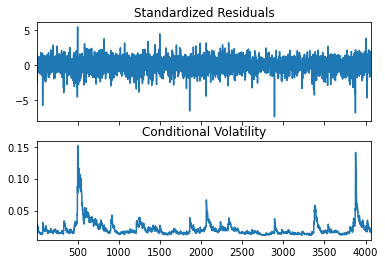

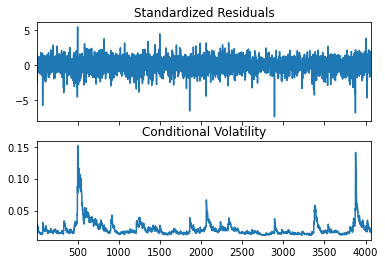

In [19]:
res.plot()

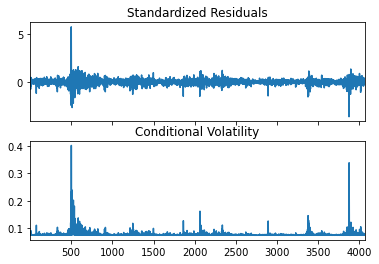

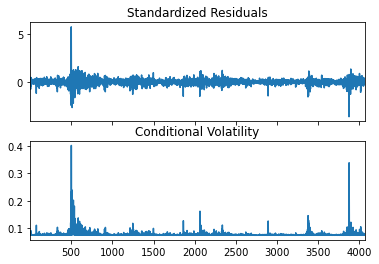

In [20]:
t_result.plot()

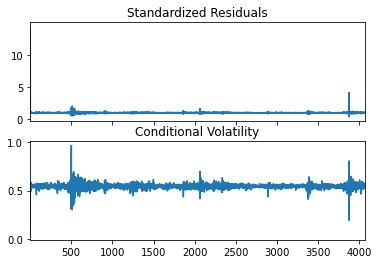

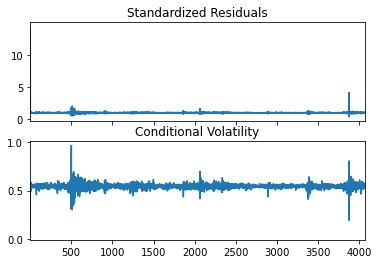

In [21]:
skewt_result.plot()

In [22]:
forecasts = res.forecast(reindex=False)

In [23]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

           h.1
4071  1.000912
           h.1
4071  0.000227
           h.1
4071  0.000227


In [24]:
print(2.56*np.sqrt(260))

41.278759671288576


In [25]:
help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'Optional[ArrayLike]', x: 'Optional[ArrayLike]' = None, mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant', lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0, vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIGARCH', 'APARCH', 'HARCH', 'FIGARCH']" = 'GARCH', p: 'Union[int, List[int]]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal', hold_back: 'Optional[int]' = None, rescale: 'Optional[bool]' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name 

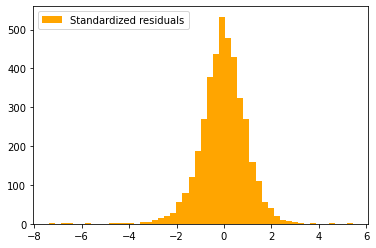

In [26]:
# Obtain model estimated residuals and volatility
gm_resid = res.resid
gm_std = res.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.legend(loc = 'upper left')
plt.show()

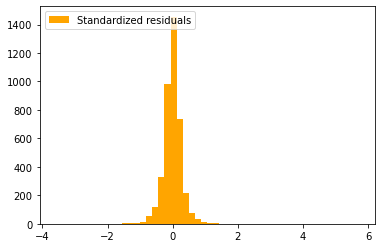

In [27]:
gm_resid = t_result.resid
gm_std = t_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.legend(loc = 'upper left')
plt.show()

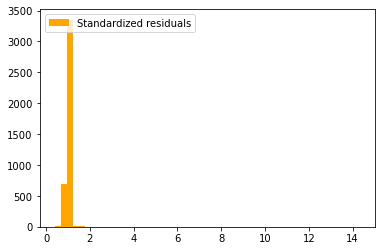

In [28]:
gm_resid = skewt_result.resid
gm_std = skewt_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.legend(loc = 'upper left')
plt.show()

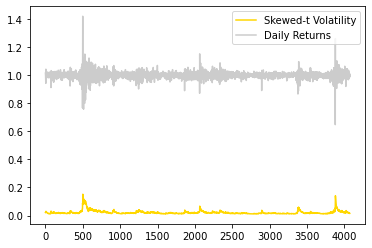

In [29]:
# Get model estimated volatility
t_vol = res.conditional_volatility

# Plot model fitting results
plt.plot(t_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(data['return'].dropna(), color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

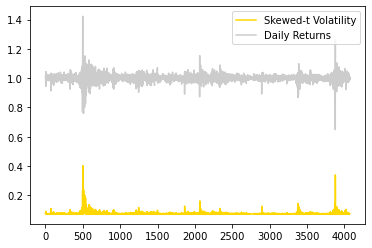

In [30]:
# Get model estimated volatility
t_vol = t_result.conditional_volatility

# Plot model fitting results
plt.plot(t_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(data['return'].dropna(), color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

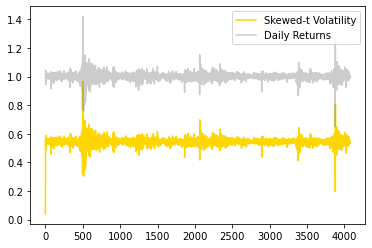

In [31]:
# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(data['return'].dropna(), color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()